In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
import shutil
import zipfile
import cv2
import os
import PIL
import numpy as np
import splitfolders
from PIL import Image
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
detector = MTCNN()
path_to_data = "./data/" 
path_to_processed_data = "./processed_datasets_new/"

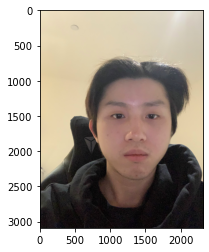

In [9]:
img = cv2.cvtColor(cv2.imread('data/lookes_wong/IMG_5596.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

# img = image.load_img('data\IMG_5596.png', target_size=(224,224,3))


In [10]:
detector = MTCNN()
path_to_data = "./data/" 
path_to_processed_data = "./processed_datasets_new/"

def extract_face(filename, required_size=(224,224)):
    # load image from file
    img_to_load = plt.imread(filename)
    
    # detect face in the image using face detector
    results = detector.detect_faces(img_to_load)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = img_to_load[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    
    return face_array

In [12]:
cropped_img = extract_face('data/lookes_wong/IMG_5596.jpg')

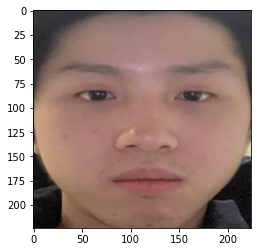

In [13]:
plt.imshow(cropped_img)

In [5]:
import shutil
if os.path.exists(path_to_processed_data):
    shutil.rmtree(path_to_processed_data)
os.mkdir(path_to_processed_data)

In [6]:
def check_if_processed_path_exists():
    if os.path.exists(path_to_processed_data):
        shutil.rmtree(path_to_processed_data)
    os.mkdir(path_to_processed_data)

In [7]:
def process_image_to_cropped_face(path_to_data):
    
    for img_dir in os.scandir(path_to_data):
        count = 0
        img_dir_path = img_dir.path
        data_name = img_dir_path.split('/')[-1]  # variable to store data's name
        
        for entry in os.scandir(img_dir):
            result = extract_face(entry.path) # extract face for every image
            if result is not None:
                processed_folder = path_to_processed_data + data_name
                if not os.path.exists(processed_folder):
                    os.makedirs(processed_folder)
                    print("Generating cropped images in folder: ", processed_folder)
                
                cropped_file_name = data_name + str(count) + ".png"
                cropped_file_path = processed_folder + "/" + cropped_file_name
                
                # save image to a new folder
                cv2.imwrite(cropped_file_path, result)
                count += 1

In [8]:
process_image_to_cropped_face("./data/")

Generating cropped images in folder:  ./processed_datasets_new/lookes_wong
Generating cropped images in folder:  ./processed_datasets_new/loovik
Generating cropped images in folder:  ./processed_datasets_new/small_liang


In [10]:
for i in os.listdir(path_to_processed_data):
    print(i)

lookes_wong
loovik
small_liang


In [12]:
def split_data(data_path):
    splitfolders.ratio(data_path, output="output", seed=1337, ratio=(.8, .2), group_prefix=None)

In [13]:
split_data(path_to_processed_data)

Copying files: 90 files [00:00, 227.83 files/s]


In [14]:
for img_dir in os.scandir('./test_images2/'):
    print(img_dir.path)

./test_images2/lookes1.jpg
./test_images2/lookes2.jpg
./test_images2/loovik1.jpg
./test_images2/loovik2.jpg
./test_images2/smallliang1.JPG
./test_images2/smallliang2.JPG
